In [1]:
#predict the demographics of a user based on their app download and usage behaviors.
#Features
# F23, F24-26, F27-28, F29-32, F33-42, F43+
# M22, M23-26, M27-28, M29-31, M32-38, M39+
#python packages Numpy,pandas,Scipy,sklearn
#baseline model= 1/12 =0.08333= mlogloss --> 2.4849

In [130]:
import pandas as pd
import os
dirpath = 'C:/Users/Apurva/Desktop/TalkingData'
gendertrain = pd.read_csv(os.path.join(dirpath,'gender_age_train.csv'),index_col='device_id')
gendertest = pd.read_csv(os.path.join(dirpath,'gender_age_test.csv'),index_col = 'device_id')
phbrand = pd.read_csv(os.path.join(dirpath,'phone_brand_device_model.csv'))
#remove duplicates
phbrand = phbrand.drop_duplicates('device_id',keep='first').set_index('device_id')
events = pd.read_csv(os.path.join(dirpath,'events.csv'))
appevents = pd.read_csv(os.path.join(dirpath,'app_events.csv'))
applabel = pd.read_csv(os.path.join(dirpath,'app_labels.csv'))

In [18]:
gendertrain.head()

,gender,age,group
device_id,,,
-8076087639492063270,M,35,M32-38
-2897161552818060146,M,35,M32-38
-8260683887967679142,M,35,M32-38
-4938849341048082022,M,30,M29-31
245133531816851882,M,30,M29-31


In [4]:
gendertrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [5]:
gendertrain.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [6]:
#the "group" variable is the response variable
gendertrain.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [7]:
#distribution by age group
import matplotlib.pyplot as plt
gendertrain.group.value_counts().plot(kind = 'bar')

In [8]:
gendertrain.group.value_counts(normalize=True)

M23-26    0.128676
M32-38    0.126948
M39+      0.114957
M22-      0.100315
M29-31    0.097917
F33-42    0.074499
M27-28    0.072945
F23-      0.067654
F29-32    0.062000
F43+      0.056186
F24-26    0.056132
F27-28    0.041771
Name: group, dtype: float64

In [9]:
gendertrain.shape

(74645, 4)

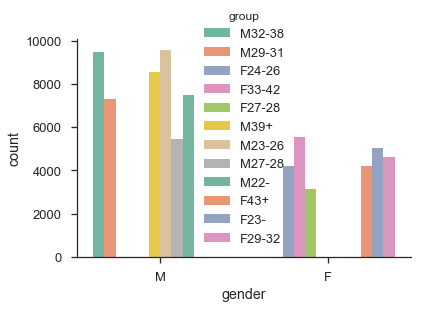

In [10]:
#distribution by gender
import seaborn as sns
sns.set(style="ticks")
sns.set_context(context="talk")
%matplotlib inline

ax = sns.countplot(x='gender', data=gendertrain, hue='group', palette='Set2')
sns.despine()

In [11]:
phbrand.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [12]:
phbrand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186716 entries, 0 to 187243
Data columns (total 3 columns):
device_id       186716 non-null int64
phone_brand     186716 non-null object
device_model    186716 non-null object
dtypes: int64(1), object(2)
memory usage: 5.7+ MB


In [13]:
import numpy as np
gendertest.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


In [19]:
#Featurize data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

gendertrain['train'] = np.arange(gendertrain.shape[0])
gendertest['test'] = np.arange(gendertest.shape[0])
gendertrain.head()


,gender,age,group,train
device_id,,,,
-8076087639492063270,M,35,M32-38,0
-2897161552818060146,M,35,M32-38,1
-8260683887967679142,M,35,M32-38,2
-4938849341048082022,M,30,M29-31,3
245133531816851882,M,30,M29-31,4


In [27]:
from scipy.sparse import csr_matrix,hstack

phbrand['brand'] = le.fit(phbrand.phone_brand).transform(phbrand.phone_brand)
gendertrain['brand'] = phbrand['brand']
train_brand = csr_matrix((np.ones(gendertrain.shape[0]), 
                       (gendertrain.train, gendertrain.brand)))
print('Brand shape {}'.format(train_brand.shape))

Brand shape (74645, 131)


In [25]:
mod = phbrand.phone_brand.str.cat(phbrand.device_model)
phbrand['model'] = le.fit(mod).transform(mod)
gendertrain['model'] = phbrand['model']
train_model = csr_matrix((np.ones(gendertrain.shape[0]), 
                       (gendertrain.train,gendertrain.model)))
print('Model shape {}'.format(train_model.shape))

Model shape (74645, 1667)


In [131]:
appevents['application_id'] =le.fit(appevents.app_id).transform(appevents.app_id)
appevents.head()

,event_id,app_id,is_installed,is_active,application_id
0,2,5927333115845830913,1,1,15408
1,2,-5720078949152207372,1,0,3384
2,2,-1633887856876571208,1,0,7620
3,2,-653184325010919369,1,1,8902
4,2,8693964245073640147,1,1,18686


In [132]:
# applabel['application_id'] = le.fit(applabel.app_id).transform(applabel.app_id)
# applabel['lbl_id'] = le.fit(applabel.label_id).transform(applabel.label_id)
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [138]:
appevent = events[['event_id','device_id','timestamp','longitude','latitude']]
# appevent['event_id'] = appevents['event_id']
appevent['application_id'] = appevents['application_id']

# = (appevents[['event_id','application_id']]
#                 .merge(events[['event_id','timestamp','longitude','latitude']])
#                 .groupby(['device_id','application_id'])['timestamp'].agg(['size'])
#                 .merge(gendertrain[['train']], how='left', left_index=True, right_index=True)
#                 .merge(gendertest[['testrow']], how='left', left_index=True, right_index=True)
#                 .reset_index())
appevent.set_index('device_id')
appevent.head()
print('shape {}'.format(appevent.shape))

shape (3252950, 6)


,event_id,device_id,timestamp,longitude,latitude,application_id
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [29]:
x_train = hstack((train_brand, train_model), format='csr')
print(' x_train shape {}'.format(x_train.shape))

 x_train shape (74645, 1798)


In [36]:
#y =gendertrain.pop("grp")

res_var = le.fit(gendertrain.group)
y = res_var.transform(gendertrain.group)
nclasses = len(res_var.classes_)

In [80]:
#  Function - cross-validation scores

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import log_loss

def training_score(clf, random_state = 0):
     kf = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=random_state)
     pred = np.zeros((y.shape[0],nclasses))
     for itrain, itest in kf:
         Xtr, Xte = x_train[itrain, :], x_train[itest, :]
         ytr, yte = y[itrain], y[itest]
         clf.fit(Xtr, ytr)
         pred[itest,:] = clf.predict_proba(Xte)
         return log_loss(yte, pred[itest, :])
         print("{:.5f}".format(log_loss(yte, pred[itest,:])), end=' ')
     print('')
     return log_loss(y, pred)



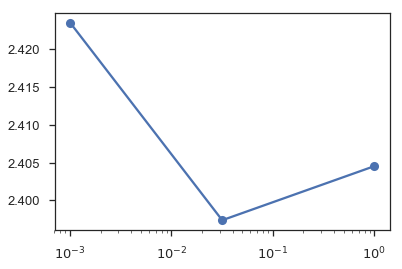

In [142]:
#regularization constant C value selection

Cs = np.logspace(-3,0,3)
res = []
for C in Cs:
    res.append(training_score(LogisticRegression(C = C)))
plt.semilogx(Cs, res,'-o')

In [103]:

training_score(LogisticRegression(C=0.02))

2.3988133174331923

In [102]:

training_score(LogisticRegression(C=0.01))

2.4016540097817831

In [46]:
clf = LogisticRegression(C=0.02, multi_class='multinomial',solver='lbfgs')
clf.fit(x_train, y)


LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
gendertest['brand'] = phbrand['brand']
test_brand = csr_matrix((np.ones(gendertest.shape[0]), 
                       (gendertest.test, gendertest.brand)))
print('Test Brand shape {}'.format( test_brand.shape))

Test Brand shape (112071, 131)


In [48]:
gendertest['model'] = phbrand['model']
test_model = csr_matrix((np.ones(gendertest.shape[0]), 
                       (gendertest.test, gendertest.model)))
print('Test Model shape {}'.format(test_model.shape))

Test Model shape (112071, 1667)


In [49]:
x_test =  hstack((test_brand, test_model), format='csr')
print('x_test shape {}'.format( x_test.shape))

x_test shape (112071, 1798)


In [52]:
pred = pd.DataFrame(clf.predict_proba(x_test), index = gendertest.index, columns=res_var.classes_)
pred.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
1002079943728939269,0.048040,0.053852,0.047758,0.062011,0.061788,0.050412,0.109317,0.154309,0.085754,0.101768,0.127033,0.097959
-1547860181818787117,0.048791,0.050602,0.042313,0.049581,0.060318,0.055444,0.100010,0.150586,0.079260,0.104396,0.132231,0.126466
7374582448058474277,0.050476,0.044201,0.033933,0.057532,0.084883,0.060842,0.079477,0.115390,0.070467,0.107187,0.146440,0.149172
-6220210354783429585,0.045180,0.049682,0.030152,0.057601,0.072733,0.056092,0.078385,0.145846,0.078382,0.115862,0.150886,0.119198
-5893464122623104785,0.045207,0.061201,0.042506,0.062047,0.057364,0.046380,0.083408,0.158025,0.094775,0.105152,0.143061,0.100873


Confusion matrix, without normalization
[[208  20   3  11  17   5 176 326   5  32 286 167]
 [100  13   4   7  12   8 115 331   6  25 238 174]
 [ 70   8   2   3  10   4  97 211   4  14 181 154]
 [ 97  13   4   9  22   8 141 275   6  20 285 260]
 [ 97  11   2   5  28   7 125 298   9  38 461 332]
 [ 54   9   3   2  29  13  98 224   6  47 314 260]
 [147   8   6  10  24   5 320 622  15  56 437 271]
 [147  10   4  12  28   7 300 854  24  78 591 378]
 [ 85  10   3   4  19   8 166 417  13  52 343 255]
 [ 77   8   6   6  29   7 188 490  12  69 562 354]
 [ 94   7   5   6  38   8 227 575  11  68 748 546]
 [ 90  13   5   9  39   4 186 488  20  41 622 616]]
Normalized confusion matrix
[[ 0.17  0.02  0.    0.01  0.01  0.    0.14  0.26  0.    0.03  0.23  0.13]
 [ 0.1   0.01  0.    0.01  0.01  0.01  0.11  0.32  0.01  0.02  0.23  0.17]
 [ 0.09  0.01  0.    0.    0.01  0.01  0.13  0.28  0.01  0.02  0.24  0.2 ]
 [ 0.09  0.01  0.    0.01  0.02  0.01  0.12  0.24  0.01  0.02  0.25  0.23]
 [ 0.07  0.01  0.  

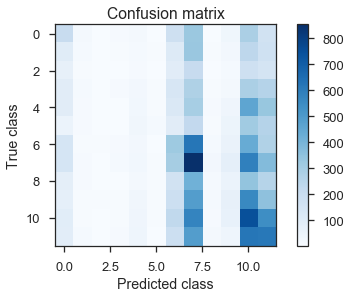

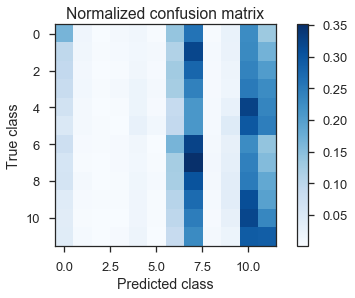

In [141]:
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True class')
    plt.xlabel('Predicted class')

# Split the data into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y)

# Run classifier
Y_pred = LogisticRegression().fit(X_train, Y_train).predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)


# Compute confusion matrix
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

In [91]:
coef = clf.coef_
coef.shape

(12, 1798)